# Answering Business Questions Using SQL

### Insert image of db schema

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def run_query(q):
        with sqlite3.connect('chinook.db') as conn:
            return pd.read_sql(q, conn)

In [3]:
def run_command(c):
    with sqlite3.connect('chinook.db') as conn:
        conn.isolation_level = None
        conn.execute(c)

In [4]:
def show_tables():
    with sqlite3.connect('chinook.db') as conn:
        q = '''
            SELECT
                name,
                type
            FROM sqlite_master
            WHERE type IN ("table", "view");
            '''
    return pd.read_sql(q, conn)

In [5]:
show_tables()

,name,type
0,album,table
1,artist,table
2,customer,table
3,employee,table
4,genre,table
5,invoice,table
6,invoice_line,table
7,media_type,table
8,playlist,table
9,playlist_track,table


In [6]:
usa_tracks_by_genre = '''
    WITH usa_tracks_sold AS
        (
        SELECT
            il.*,
            c.country
        FROM invoice_line il
        INNER JOIN invoice i ON i.invoice_id=il.invoice_id
        INNER JOIN customer c ON c.customer_id=i.customer_id
        WHERE c.country="USA"
        )
        
    SELECT
        g.name genre,
        COUNT(u.invoice_line_id) tracks_sold,
        CAST(COUNT(t.genre_id) AS FLOAT) / (SELECT COUNT(*) FROM usa_tracks_sold) percent_of_total
    FROM usa_tracks_sold u
    INNER JOIN track t ON t.track_id=u.track_id
    INNER JOIN genre g ON g.genre_id=t.genre_id
    GROUP BY genre
    ORDER BY tracks_sold DESC
    LIMIT 10
    '''
run_query(usa_tracks_by_genre)

,genre,tracks_sold,percent_of_total
0,Rock,561,0.533777
1,Alternative & Punk,130,0.123692
2,Metal,124,0.117983
3,R&B/Soul,53,0.050428
4,Blues,36,0.034253
5,Alternative,35,0.033302
6,Latin,22,0.020932
7,Pop,22,0.020932
8,Hip Hop/Rap,20,0.019029
9,Jazz,14,0.013321


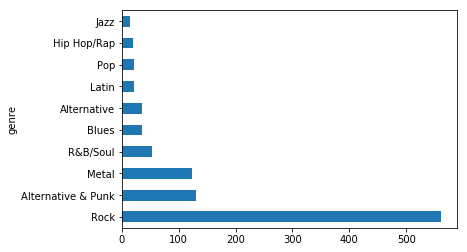

In [11]:
genre_sales_usa = run_query(usa_tracks_by_genre).set_index("genre")
genre_sales_usa['tracks_sold'].plot.barh()

plt.show()